In [30]:
#generate a hexagon
import math
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.cm as cm

def hexagon_generator(edge_length, offset):
    """Generator for coordinates in a hexagon."""
    x, y = offset
    for angle in range(0, 360, 60):
        x += math.cos(math.radians(angle)) * edge_length
        y += math.sin(math.radians(angle)) * edge_length
        yield x, y

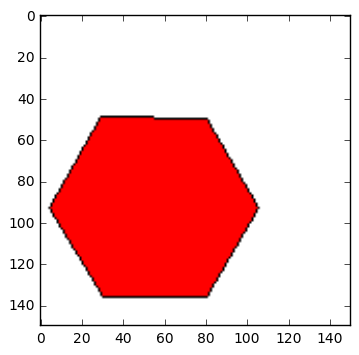

In [2]:
image = Image.new('RGB', (150, 150), 'white')
draw = ImageDraw.Draw(image)
hexagon = list(hexagon_generator(50, offset=(30, 50)))
draw.polygon(hexagon, outline='black', fill='red')
plt.imshow(image)

In [3]:
print np.asarray(hexagon)

[[  80.           50.        ]
 [ 105.           93.30127019]
 [  80.          136.60254038]
 [  30.          136.60254038]
 [   5.           93.30127019]
 [  30.           50.        ]]


In [4]:
nphex = np.asarray(hexagon)
print nphex.shape 

(6, 2)


In [5]:
def subdivide_lines(lines, subdivisions=50, close=False):
    '''given an np array of points that define lines, returns an array of points on the line
       with # subdivisions each. Close if you want a closed loop'''
    
    subdivided = []
    for i in xrange(0, lines.shape[0]):
        r = lines[i]
        line = []
        if i != lines.shape[0] - 1:
            v = lines[i+1] - lines[i]
        elif i == lines.shape[0] - 1 and close:
            v = lines[0] - lines[i]
        else:
            return np.asarray(subdivided)
        for j in xrange(1, subdivisions+1):
            line.append(np.asarray(r + (j*1.0/subdivisions)*v))
        subdivided.append(np.asarray(line))
            
    return np.asarray(subdivided)

In [6]:
subhex = subdivide_lines(nphex, close=True)
print subhex.shape

(6, 50, 2)


In [7]:
flathex = subhex.reshape(-1,2)
flathex = flathex.T
print flathex.shape

(2, 300)


In [8]:
def cartesian_to_cylindrical(x, y, z):
    '''Given 3 np arrays--x, y, z--of cartesian points, returns a np array of r, theta (in radians), z'''
    c_list = []
    for i in xrange(len(x)):
        # print (x[i], y[i])
        r = np.sqrt(float(x[i])**2 + float(y[i])**2)
        t = np.arctan2(float(y[i]), float(x[i]))
        c_list.append([r, t, float(z[i])])
    return np.asarray(c_list)


In [9]:
cylin_hex = cartesian_to_cylindrical(flathex[0,:], flathex[1,:], np.zeros(flathex.shape[1]))

/Users/noon/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


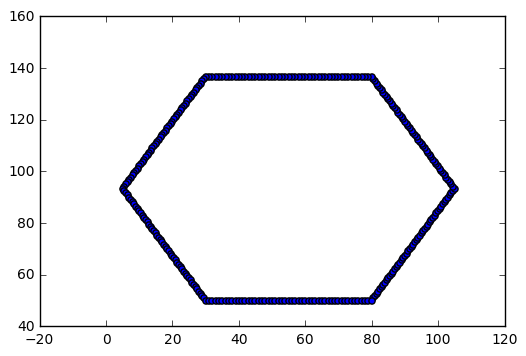

In [11]:
plt.scatter(flathex[0,:], flathex[1,:])
plt.show()

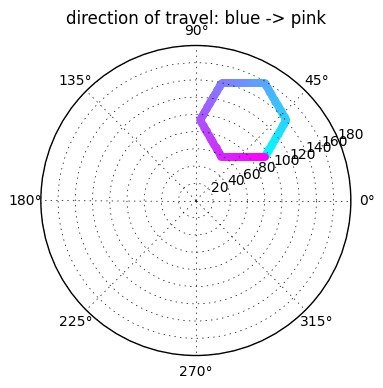

In [37]:
r = cylin_hex[:,0]
theta = cylin_hex[:,1]
ax = plt.subplot(111, projection='polar')
colorspace = np.linspace(0, 1, len(theta))
for rval, tval, i in zip(r, theta, colorspace):
    ax.scatter(tval, rval, color=cm.cool(i), linewidth=1)
plt.title("direction of travel: blue -> pink")
plt.show()


In [38]:
#writing gcode (NOTE: CHECK MOTORS FOR Z <-> THETA CONVERSION TOMORROW)

def write_gcode(f, r, t, z):
    print ('theta: ', math.degrees(t), 'r: ', r)
    z_r = t * 1.25/(2*math.pi) #rot #currently, a full revolution = 1.25 in gcode
    y = z #vert, unused right now
    x = r + 100 #radial; X motor's zero is at 100
    #note: we don't care about Y right now
    f.write("G0 X%f\n" % x)
    f.write("G0 Z%f\n" % z_r)
    f.write("M400\n") #waits to finish

In [39]:
with open ('test.gcode', 'wb+') as f:
    for point in cylin_hex:
        write_gcode(f, point[0], point[1], point[2])

('theta: ', 32.28781312256458, 'r: ', 95.22395990704463)
('theta: ', 32.565040004772854, 'r: ', 96.11037967231681)
('theta: ', 32.83719369200972, 'r: ', 96.999008351298798)
('theta: ', 33.104400228991324, 'r: ', 97.889785787454741)
('theta: ', 33.3667819806392, 'r: ', 98.782653851231487)
('theta: ', 33.62445774246001, 'r: ', 99.677556361854414)
('theta: ', 33.877542848434246, 'r: ', 100.57443901235098)
('theta: ', 34.12614927635427, 'r: ', 101.4732492976723)
('theta: ', 34.370385750568786, 'r: ', 102.3739364457868)
('theta: ', 34.61035784210667, 'r: ', 103.27645135162439)
('theta: ', 34.84616806616648, 'r: ', 104.18074651375312)
('theta: ', 35.07791597696929, 'r: ', 105.08677597367486)
('theta: ', 35.30569825998325, 'r: ', 105.99449525763011)
('theta: ', 35.529608821536634, 'r: ', 106.90386132080643)
('theta: ', 35.74973887584379, 'r: ', 107.81483249384873)
('theta: ', 35.966177029475254, 'r: ', 108.72736843157338)
('theta: ', 36.17900936330818, 'r: ', 109.6414300637927)
('theta: ', 36